# What is the salary distribution for the most in-demand roles in the US

In [2]:
# Step 1: Load the dataset (CSV or DataFrame)
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


In [ ]:
# Step 1: Filter the dataset for only United States roles
df_US = df[df['job_country'] == 'United States'].copy()
# drop na from job_yearly_salary
df_US.info()

In [17]:
# Step 2: Group by 'job_title_short' and count the number of postings per role
df_grouped = df_US.value_counts('job_title_short').reset_index(name='count')
df_grouped

,job_title_short,count
0,Data Analyst,67816
1,Data Scientist,58830
2,Data Engineer,35080
3,Senior Data Scientist,12946
4,Senior Data Analyst,11791
5,Senior Data Engineer,9289
6,Business Analyst,7382
7,Software Engineer,1814
8,Machine Learning Engineer,921
9,Cloud Engineer,423


In [30]:
# Step 3: Create a list of top 6 job titles
list_top_6_job_titles = df_grouped['job_title_short'].tolist()[:6]
list_top_6_job_titles

['Data Analyst',
 'Data Scientist',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Analyst',
 'Senior Data Engineer']

In [ ]:
# Step 4: Filter the US dataset to include only rows where 'job_title_short' matches one of those 6 roles
df_top_6 = df_US[df_US['job_title_short'].isin(top_6_job_titles_list)]
df_top_6.info()

In [ ]:
# Step 5: Drop rows with missing salary information (e.g., 'salary_year_avg' is null)
df_top_6 = df_top_6.dropna(subset=['salary_year_avg'])
df_top_6.head()

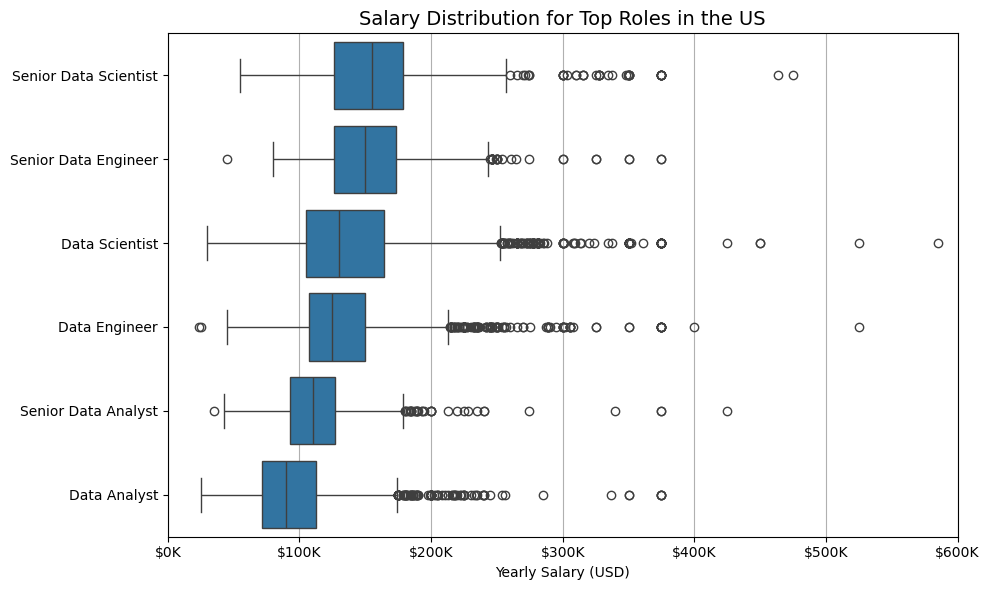

In [ ]:
# Step 6: Use Seaborn to create a horizontal boxplot:

# Calculate the median salary for each job title and sort by it
median_salaries = df_top_6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False)
sorted_job_titles = median_salaries.index.tolist()

# Plot the boxplot with a single color and sorted y-axis
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='salary_year_avg',
    y='job_title_short',
    data=df_top_6,
    order=sorted_job_titles,  # Sort y-axis by median salary
)
# Format the x-axis labels to show dollar amounts in thousands (e.g., $100K)
import matplotlib.ticker as mtick
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${int(x / 1000)}K'))

plt.xlim(0, 600000)  
plt.title('Salary Distribution for Top Roles in the US', fontsize=14)
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

# Investigate Median Salary Vs Skill for Data Analysts only

In [52]:
# Step 1: Filter for US data analyst jobs only. Call it df_DA_US
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & 
               (df['job_country'] == 'United States')].copy()
# drop na from salary_year_avg
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

In [ ]:
# Step 2: Explode job_skills column
df_DA_US_exploded = df_DA_US.explode('job_skills')
df_DA_US_exploded

In [ ]:
# Step 3: Count the number of occurrences of each skill and select top 10
top_10_demand_skills_list = df_DA_US_exploded.value_counts('job_skills').head(10).index.tolist()
top_10_demand_skills_list

In [79]:
# Step 4: Count the median salary for top_10_demand skill calucted in Step 3
median_salary_df = df_DA_US_exploded.pivot_table(index='job_skills', values='salary_year_avg', aggfunc='median')
top_10_demand_skills_df = median_salary_df[median_salary_df.index.isin(top_10_demand_skills_list)]
top_10_demand_skills_df = median_salary_df.reindex(top_10_demand_skills_list)
top_10_demand_skills_df

,salary_year_avg
job_skills,
sql,91000.00
excel,84392.00
python,97500.00
tableau,92875.00
sas,90000.00
r,92500.00
power bi,90000.00
powerpoint,85000.00
word,81194.75


In [66]:
# Step 5: Count the median salary for each skill and select top 10 skills.
top_10_paying_skills_df = df_DA_US_exploded.pivot_table(index='job_skills', values='salary_year_avg', aggfunc='median').sort_values('salary_year_avg', ascending=False).head(10)
top_10_paying_skills_df

,salary_year_avg
job_skills,
dplyr,196250.0
bitbucket,189000.0
gitlab,186000.0
solidity,179000.0
hugging face,175000.0
couchbase,160515.0
ansible,159640.0
mxnet,149000.0
cassandra,148250.0


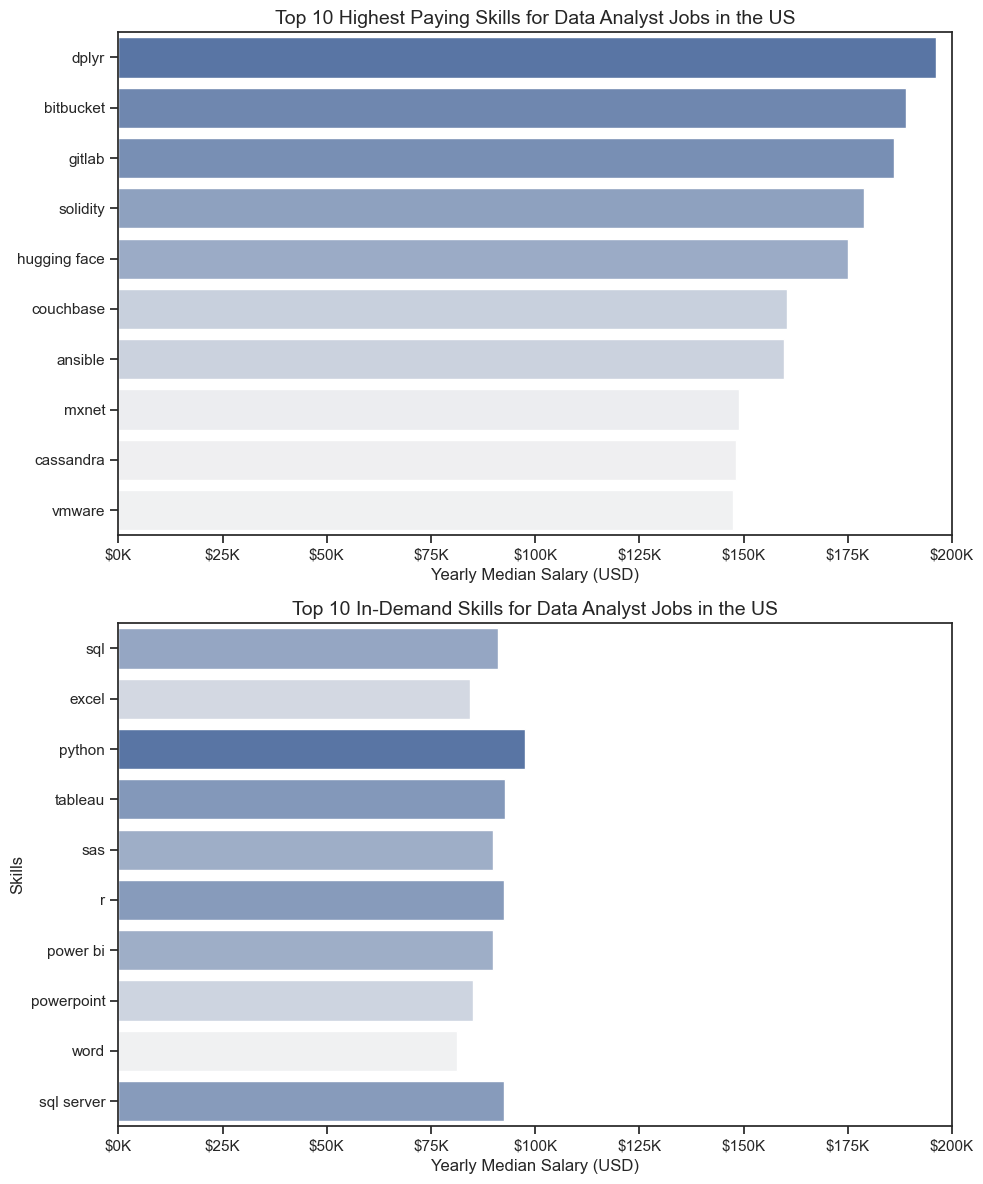

In [80]:
import matplotlib.ticker as mtick

# Create the figure and subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))
sns.set_theme(style='ticks')

# Plot 1: Top 10 Highest Paying Skills
sns.barplot(
    data=top_10_paying_skills_df.reset_index(),
    x='salary_year_avg',
    y='job_skills',
    hue='salary_year_avg',
    ax=ax1,
    palette='light:b',
)
ax1.set_title('Top 10 Highest Paying Skills for Data Analyst Jobs in the US', fontsize=14)
ax1.set_xlabel('Yearly Median Salary (USD)')
ax1.set_ylabel('')
ax1.legend().remove()  # Remove the legend for clarity
ax1.set_xlim(0, 200000)  # Set x-axis range for the first subplot
ax1.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${int(x / 1000)}K'))

# Plot 2: Top 10 In-Demand Skills
sns.barplot(
    data=top_10_demand_skills_df.reset_index(),
    x='salary_year_avg',
    y='job_skills',
    hue='salary_year_avg',
    ax=ax2,
    palette='light:b',
)
ax2.set_title('Top 10 In-Demand Skills for Data Analyst Jobs in the US', fontsize=14)
ax2.set_xlabel('Yearly Median Salary (USD)')
ax2.set_ylabel('Skills')
ax2.legend().remove()  # Remove the legend for clarity
ax2.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${int(x / 1000)}K'))
ax2.set_xlim(0, 200000)  # Set x-axis range for the second subplot

# Adjust layout and spacing
fig.tight_layout()

plt.show()